## Machine Learning Basic

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


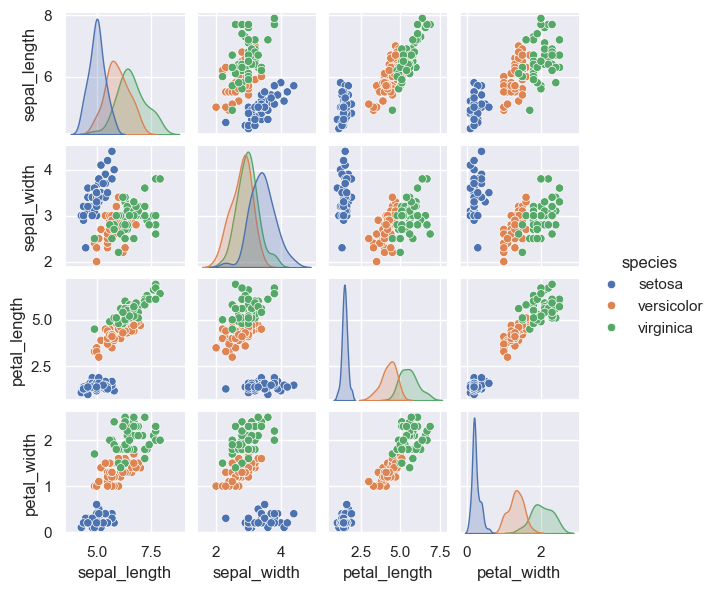

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

Supervised learning example: Simple linear regression

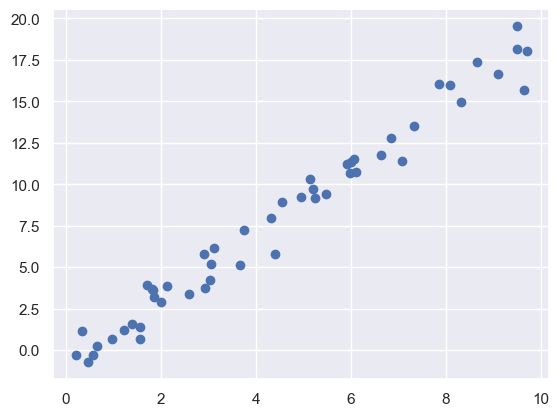

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [8]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
model.coef_

array([1.9776566])

In [14]:
model.intercept_

np.float64(-0.903310725531111)

In [15]:
xfit = np.linspace(-1, 11)

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

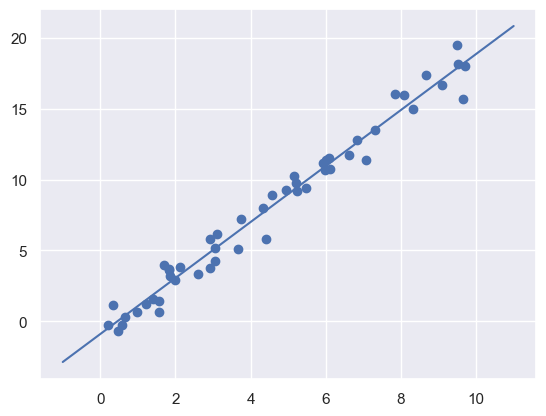

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning example: Iris classification

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning example: Iris dimensionality

In [21]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

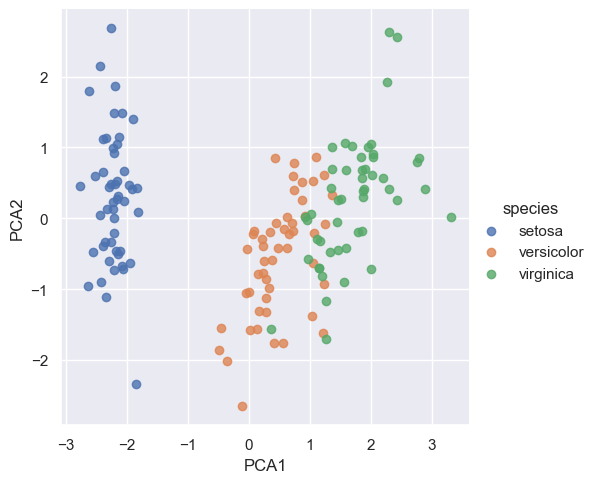

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming iris is a DataFrame containing the Iris dataset
# Load the Iris dataset if not already loaded
# iris = pd.read_csv('iris.csv')

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.drop(columns='species'))

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Add the PCA components to the original DataFrame
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# Create a scatter plot using Seaborn
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

Unsupervised learning: Iris clustering

In [23]:
from sklearn.mixture import GaussianMixture  # Use this instead of GMM

# Instantiate the model with hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# Fit to data. Notice y is not specified!
model.fit(X_iris)

# Determine cluster labels
y_gmm = model.predict(X_iris)

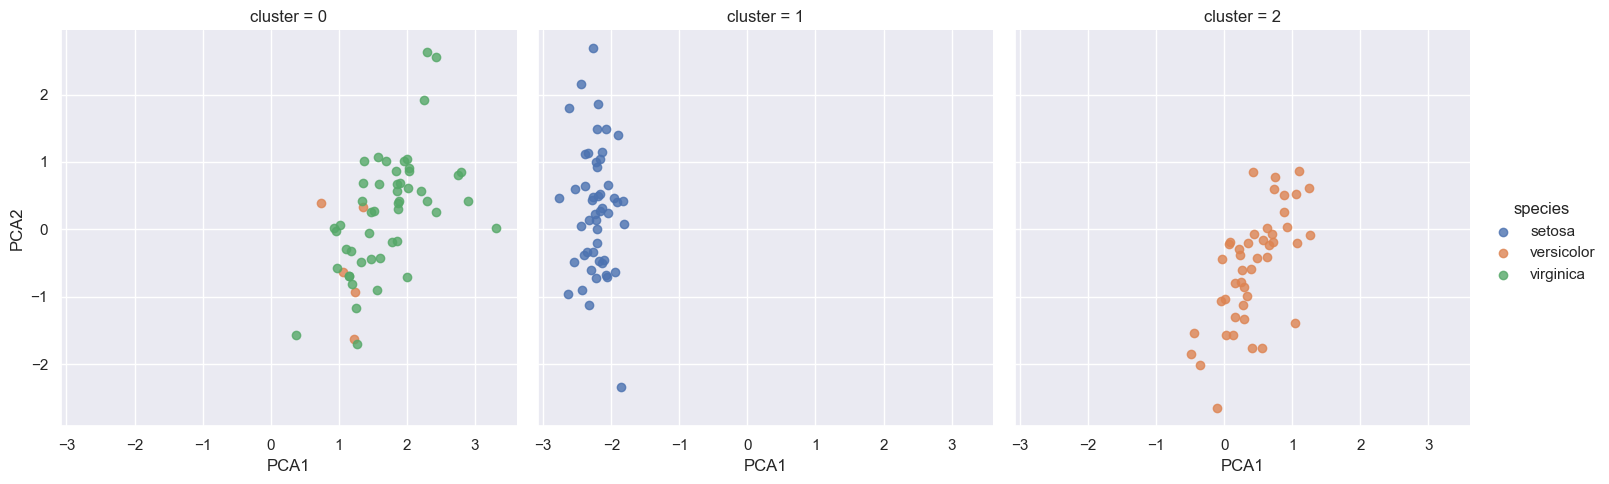

In [24]:
# Assuming 'iris', 'y_gmm' are already defined and 'PCA1' and 'PCA2' are columns in 'iris'
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

Application: Exploring Hand-written Digits

Loading and visualizing the digits data

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

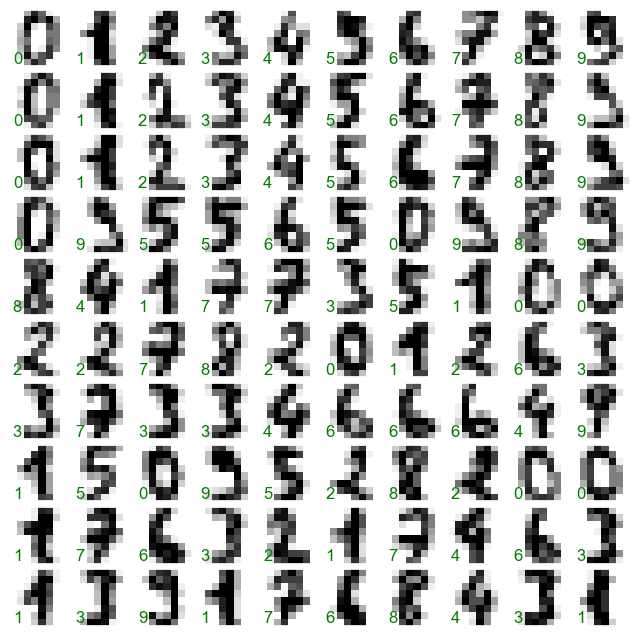

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

Unsupervised learning: Dimensionality reduction

In [29]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:360: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\M. Albar Ghiffar\AppData\Local\Temp\ipykernel_8656\1763508088.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


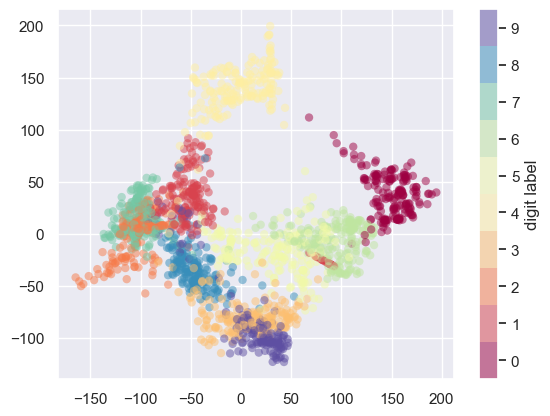

In [30]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Classification on digits

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

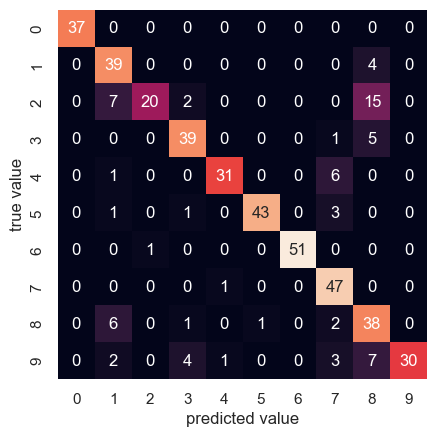

In [34]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

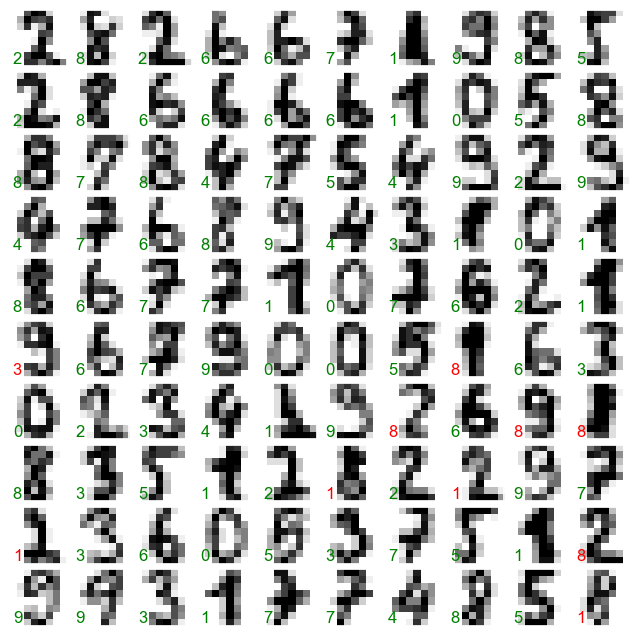

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Hyperparameters and Model Validation

Model validation the wrong way

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [38]:
model.fit(X, y)
y_model = model.predict(X)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Model validation the right way: Holdout sets

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy = accuracy_score(y2, y2_model)
print(accuracy)

0.9066666666666666


Model validation via cross-validation

In [41]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [42]:
from sklearn.model_selection import cross_val_score

# Assuming model, X, and y are already defined
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [43]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Assuming model, X, and y are already defined
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)

print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [44]:
scores.mean()

np.float64(0.96)

Validation curves in Scikit-Learn

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [58]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

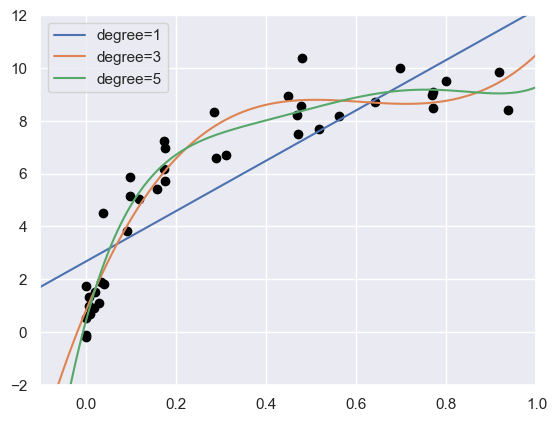

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [60]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a pipeline to combine Polynomial Features and Linear Regression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('linearregression', LinearRegression())
])

degree = np.arange(0, 21)
train_score, val_score = validation_curve(pipeline, X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

TypeError: too many positional arguments

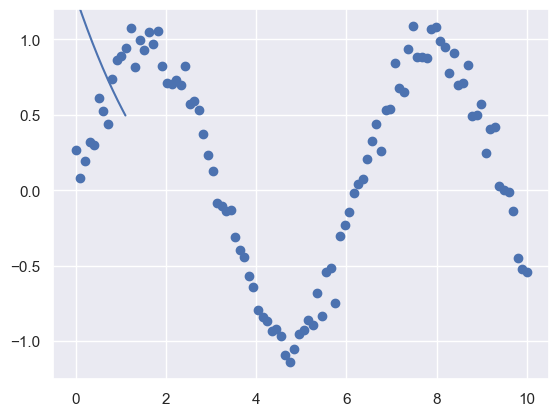

In [61]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Learning Curves

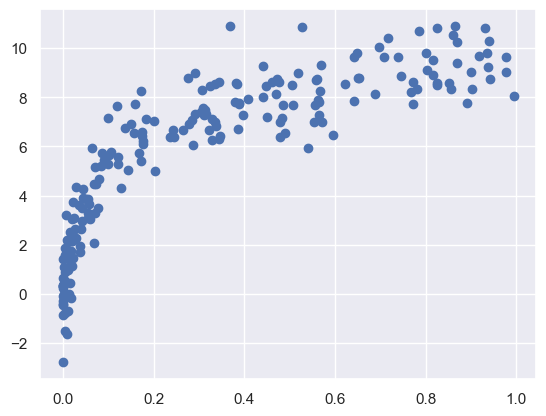

In [62]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

In [63]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

TypeError: too many positional arguments

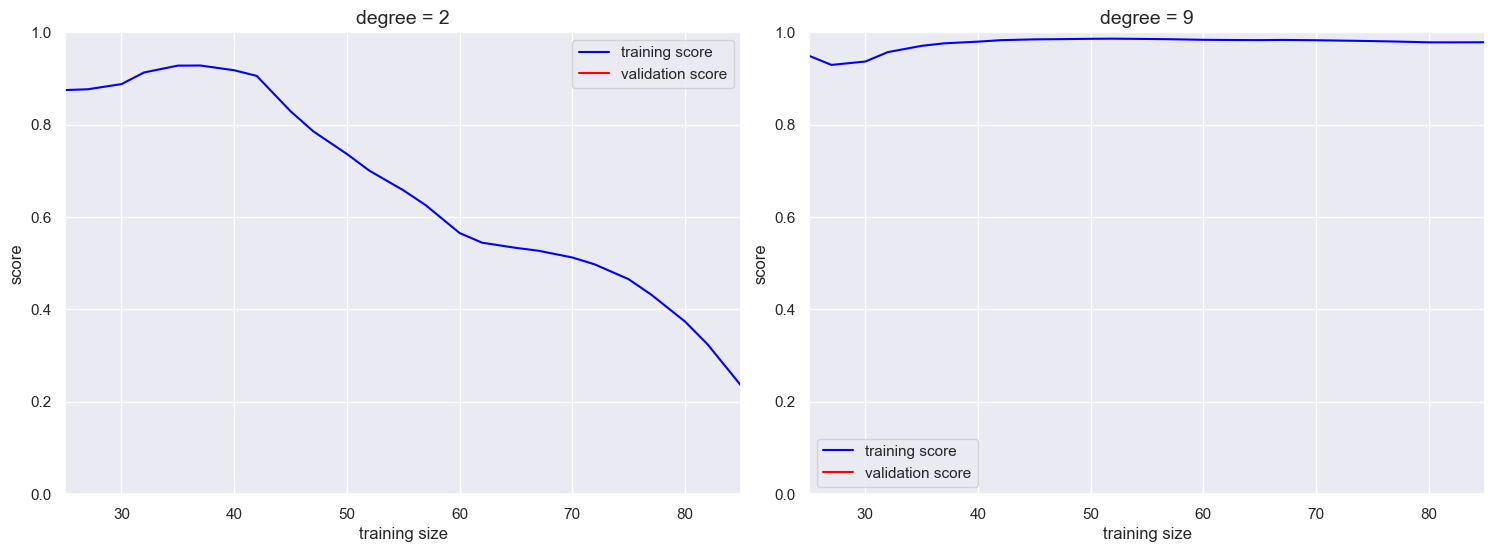

In [65]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Validation in Practice: Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameter grid without 'normalize'
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [-1],  # Use all available cores
    'positive': [False]  # Not used by default but included for completeness
}

# Create the GridSearchCV object with the modified param_grid
grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Fit the grid search on your data
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [False]})

In [71]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}

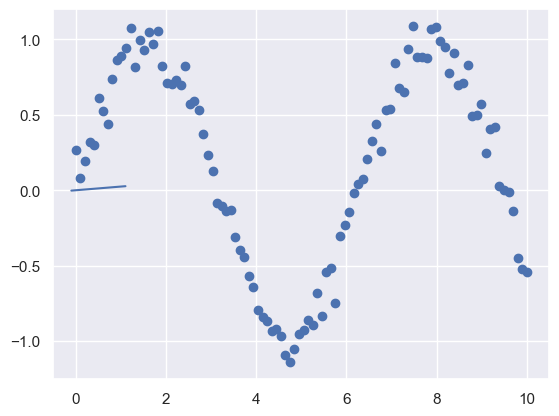

In [73]:
import matplotlib.pyplot as plt

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);